In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [4]:
#oading the dataset
customer_data = pd.read_csv('C:/Users/Admin/Downloads/New folder (10)/Mall_Customers.csv')

In [5]:
customer_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
#checking for missing values 

customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [11]:
#The value of X

X = customer_data.iloc[:,[3,4]].values

### Choosing the number of clusters 

In [13]:
#finding WCSS (Within cluster sum of squares) for different number of clusters

wcss =[]

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    
    
    wcss.append(kmeans.inertia_)

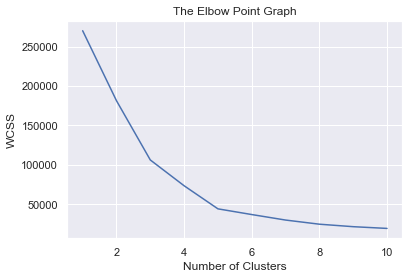

In [14]:
#creating a elbow graph 

sns.set()
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

### Optimum number of clusters = 5 (0, 1, 2, 3, 4)

In [15]:
#Training the model - K means Clustering

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

In [17]:
#return a label for each data point based on their cluster

Y = kmeans.fit_predict(X)

In [18]:
Y

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

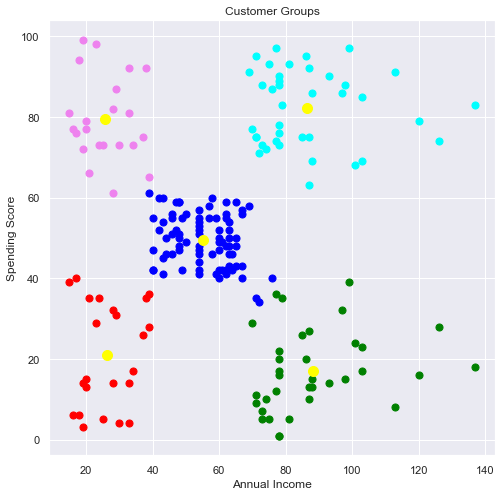

In [35]:
#visualizing the clusters
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0, 1], s=50, c='green', label='Cluster1')
plt.scatter(X[Y==1,0], X[Y==1, 1], s=50, c='blue', label='Cluster2')
plt.scatter(X[Y==2,0], X[Y==2, 1], s=50, c='cyan', label='Cluster3')
plt.scatter(X[Y==3,0], X[Y==3, 1], s=50, c='violet', label='Cluster4')
plt.scatter(X[Y==4,0], X[Y==4, 1], s=50, c='red', label='Cluster5')

#plotting the centroids 

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c= 'yellow', label='centroid')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [ ]:
#people in the violet cluster don't have a high annual income, but a high spending score.
#people in the red cluster, have a low annual income and a low spending score.
#people in the green cluster, have a high annual income, but low spending score.
#people in the cyan cluster, have a high annual income, and high spending score.